# **Real-Time Sentiment Analysis**
This project works with data that has been compiled in real-time. The data consists of Reddit Posts and Comments from the following Subreddits:
- news
- gaming
- Showerthoughts
## Project Goal
- Apply sentiment analysis using deep learning NLP (BERT) to dataset
- Train models to accurately predict sentiment of posts and comments
- Create insightful visualizations of findings

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Data
comments_df = pd.read_csv(r"C:\Users\Main\OneDrive\Desktop\DataScience\ProjectFiles\RedditAPIProject\MainGitHubRepo\real-time-sentiment-dashboard\data\Archive-Data_Log-2\archived_reddit_comments_data_20250615_024634.csv")
posts_df = pd.read_csv(r"C:\Users\Main\OneDrive\Desktop\DataScience\ProjectFiles\RedditAPIProject\MainGitHubRepo\real-time-sentiment-dashboard\data\Archive-Data_Log-2\archived_reddit_posts_data_20250615_024634.csv")

## **Data Cleaning**

In [3]:
comments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254429 entries, 0 to 254428
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             254429 non-null  int64  
 1   comment_id     254429 non-null  object 
 2   body           254420 non-null  object 
 3   author         254429 non-null  object 
 4   score          254429 non-null  int64  
 5   created_utc    254429 non-null  object 
 6   subreddit      254429 non-null  object 
 7   is_submitter   254429 non-null  bool   
 8   depth          0 non-null       float64
 9   distinguished  2729 non-null    object 
 10  parent_id      254429 non-null  object 
 11  link_id        254429 non-null  object 
 12  ingested_at    254429 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 23.5+ MB


In [4]:
posts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1396 non-null   int64 
 1   post_id       1396 non-null   object
 2   title         1396 non-null   object
 3   selftext      496 non-null    object
 4   author        1396 non-null   object
 5   score         1396 non-null   int64 
 6   num_comments  1396 non-null   int64 
 7   created_utc   1396 non-null   object
 8   subreddit     1396 non-null   object
 9   flair         134 non-null    object
 10  url           1396 non-null   object
 11  over_18       1396 non-null   bool  
 12  is_self       1396 non-null   bool  
 13  ingested_at   1396 non-null   object
dtypes: bool(2), int64(3), object(9)
memory usage: 133.7+ KB


In [5]:
comments_df.head()

,id,comment_id,body,author,score,created_utc,subreddit,is_submitter,depth,distinguished,parent_id,link_id,ingested_at
0,33013,mvwh8fx,hospitals should be left to people who believe...,JoesG527,1,2025-06-04 05:16:47,news,False,NaN,NaN,t1_mvwa057,t3_1l2qplg,2025-06-04 05:16:59.393014
1,33014,mvwh9vi,https://x.com/GollumGame/status/16621241086147...,Jaune_Anonyme,1,2025-06-04 05:17:05,gaming,False,NaN,NaN,t1_mvwfehd,t3_1l2vgiy,2025-06-04 05:17:17.195573
2,33015,mvwhaop,Kingdoms of Amalur: reckoning \r\nIt wasn’t t...,fneagen,1,2025-06-04 05:17:16,gaming,False,NaN,NaN,t3_1l2vgiy,t3_1l2vgiy,2025-06-04 05:17:26.530483
3,33016,mvwhb4t,I may be wrong on that but they're still mostl...,RZ_Domain,1,2025-06-04 05:17:21,gaming,False,NaN,NaN,t1_mvwbgfc,t3_1l2vgiy,2025-06-04 05:17:35.886598
4,33017,mvwhbuy,I do believe it's the current world record hol...,ravenousld3341,1,2025-06-04 05:17:31,gaming,False,NaN,NaN,t1_mvw4va8,t3_1l2vgiy,2025-06-04 05:17:45.332596


In [6]:
comments_df.tail()

,id,comment_id,body,author,score,created_utc,subreddit,is_submitter,depth,distinguished,parent_id,link_id,ingested_at
254424,287434,mxuihkg,"[He is an illegal immigrant, per this article ...",boxfortcommando,1,2025-06-15 02:45:15,news,False,NaN,NaN,t1_mxue4ly,t3_1lbp2u5,2025-06-15 02:45:26.773841
254425,287435,mxuihzk,"not to give Kaczynski any props, but he was pr...",ms_directed,1,2025-06-15 02:45:20,news,False,NaN,NaN,t1_mxuhzrs,t3_1lbkcnt,2025-06-15 02:45:31.651460
254426,287436,mxuii1e,The US spent $6 trillion claiming to be agains...,Zak_Rahman,1,2025-06-15 02:45:20,news,False,NaN,NaN,t3_1lbbfuu,t3_1lbbfuu,2025-06-15 02:45:32.153652
254427,287437,mxuii4s,I’ve met people on that side who are 100% in f...,horseman5K,1,2025-06-15 02:45:21,news,False,NaN,NaN,t1_mxt9wt1,t3_1lbkcnt,2025-06-15 02:45:32.779532
254428,287438,mxuiidl,RIP the husband and dog,Alive-Monk-5705,1,2025-06-15 02:45:24,news,False,NaN,NaN,t3_1lbbfuu,t3_1lbbfuu,2025-06-15 02:45:35.265887


In [7]:
comments_df.dtypes

id                 int64
comment_id        object
body              object
author            object
score              int64
created_utc       object
subreddit         object
is_submitter        bool
depth            float64
distinguished     object
parent_id         object
link_id           object
ingested_at       object
dtype: object

In [8]:
posts_df.dtypes

id               int64
post_id         object
title           object
selftext        object
author          object
score            int64
num_comments     int64
created_utc     object
subreddit       object
flair           object
url             object
over_18           bool
is_self           bool
ingested_at     object
dtype: object

In [9]:
comments_df.nunique() 

id               254429
comment_id       254429
body             248509
author           110197
score                 1
created_utc      216877
subreddit             3
is_submitter          2
depth                 0
distinguished         1
parent_id         91254
link_id            4211
ingested_at      254429
dtype: int64

In [10]:
posts_df.nunique()

id              1396
post_id         1395
title           1373
selftext         492
author          1001
score              4
num_comments       7
created_utc     1394
subreddit          3
flair             10
url             1373
over_18            2
is_self            2
ingested_at     1396
dtype: int64

### Fields removed from dataset for EDA and Modeling
**Score:**
- Reddit gives the author an automatic +1 upvote when they post a comment.
- The data was ingested within a few seconds after being posted.
- No one had time to engage with posts and comments given the small timeframe from posting to ingestion.
- For nearly all fresh comments, `score = 1` is essentially a constant — not meaningful from an analytics perspective at ingestion time.

**Depth:**
- Same circumstance as `Score` field.
- Not enough time given for Reddit users to reply to comments
- For all comments, `depth = NaN` is a constant

In [11]:
comments_df2 = comments_df.drop(['score', 'depth'], axis=1)
posts_df2 = posts_df.drop(['score'], axis=1)

In [12]:
comments_df2.columns

Index(['id', 'comment_id', 'body', 'author', 'created_utc', 'subreddit',
       'is_submitter', 'distinguished', 'parent_id', 'link_id', 'ingested_at'],
      dtype='object')

In [13]:
posts_df2.columns

Index(['id', 'post_id', 'title', 'selftext', 'author', 'num_comments',
       'created_utc', 'subreddit', 'flair', 'url', 'over_18', 'is_self',
       'ingested_at'],
      dtype='object')

In [14]:
posts_df2.duplicated().sum()

np.int64(0)

In [15]:
comments_df2.duplicated().sum()

np.int64(0)

In [16]:
comments_df2.isnull().sum()

id                    0
comment_id            0
body                  9
author                0
created_utc           0
subreddit             0
is_submitter          0
distinguished    251700
parent_id             0
link_id               0
ingested_at           0
dtype: int64

In [17]:
# Dropped null values in `body` field
comments_df2 = comments_df2.dropna(subset='body')
comments_df2.isnull().sum()

id                    0
comment_id            0
body                  0
author                0
created_utc           0
subreddit             0
is_submitter          0
distinguished    251691
parent_id             0
link_id               0
ingested_at           0
dtype: int64

In [18]:
# Replace null values in `distinguished` with "Normal User"
comments_df2['distinguished'] = comments_df2['distinguished'].fillna('Normal User')
# Verify the updates were made correctly
comments_df2.isnull().sum()

id               0
comment_id       0
body             0
author           0
created_utc      0
subreddit        0
is_submitter     0
distinguished    0
parent_id        0
link_id          0
ingested_at      0
dtype: int64

In [19]:
comments_df2['distinguished'].value_counts()

distinguished
Normal User    251691
moderator        2729
Name: count, dtype: int64

In [20]:
posts_df2.isnull().sum()

id                 0
post_id            0
title              0
selftext         900
author             0
num_comments       0
created_utc        0
subreddit          0
flair           1262
url                0
over_18            0
is_self            0
ingested_at        0
dtype: int64

In [21]:
# Replace null values in `selftext` with "[no text]"
posts_df2['selftext'] = posts_df2['selftext'].fillna('[no text]')

# Replace null values in `flair` with "Unknown"
posts_df2['flair'] = posts_df2['flair'].fillna('Unknown')

#Verify updates were made correctly
posts_df2.isnull().sum()

id              0
post_id         0
title           0
selftext        0
author          0
num_comments    0
created_utc     0
subreddit       0
flair           0
url             0
over_18         0
is_self         0
ingested_at     0
dtype: int64

In [22]:
posts_df2['num_comments'].value_counts()

num_comments
0    1291
2      89
3       8
1       5
7       1
8       1
4       1
Name: count, dtype: int64

In [23]:
comments_df2['subreddit'].value_counts()

subreddit
gaming            135140
news              111864
Showerthoughts      7416
Name: count, dtype: int64

In [24]:
posts_df2['subreddit'].value_counts()

subreddit
gaming            904
news              391
Showerthoughts    101
Name: count, dtype: int64

In [25]:
posts_df2['over_18'].value_counts()

over_18
False    1389
True        7
Name: count, dtype: int64

### Normalize text fields for sentiment analysis
**Posts DataFrame Fields:**
- `title`
- `selftext`

**Comments DataFrame Fields:**
- `body`

#### Posts DataFrame Normalization

In [26]:
import re

posts_df2['title'] = posts_df2['title'].str.strip()
posts_df2['selftext'] = posts_df2['selftext'].str.strip()
posts_df2['title'] = posts_df2['title'].str.lower()
posts_df2['selftext'] = posts_df2['selftext'].str.lower()
posts_df2['title'] = posts_df2['title'].apply(lambda x: re.sub(r'http\S+|www\.\S+', '', x))
posts_df2['selftext'] = posts_df2['selftext'].apply(lambda x: re.sub(r'http\S+|www\.\S+', '', x))

In [27]:
posts_df2['title'].head()

0    just finished the hbo series, so my non gamer ...
1                            emotional impact of games
2    university of michigan student fled to china a...
3                      what are you playing wednesday!
4           hell is us is looking and playing amazing.
Name: title, dtype: object

In [28]:
posts_df2['selftext'].head()

0        the last of us just in case it’s not obvious.
1    it just came to me, how much harder emotional ...
2                                            [no text]
3    what game's got your attention this week? what...
4    finished the demo twice already and i'm very h...
Name: selftext, dtype: object

#### Comments DataFrame Normalization

In [29]:
comments_df2['body'] = comments_df2['body'].str.strip()
comments_df2['body'] = comments_df2['body'].str.lower()
comments_df2['body'] = comments_df2['body'].apply(lambda x: re.sub(r'http\S+|www\.\S+', '', x))

In [30]:
comments_df2['body'].head()

0    hospitals should be left to people who believe...
1    \r\n\r\ngame came out the 25. 26 they posted t...
2    kingdoms of amalur: reckoning  \r\nit wasn’t t...
3    i may be wrong on that but they're still mostl...
4    i do believe it's the current world record hol...
Name: body, dtype: object

### Isolate data within a 7-day window

In [31]:
# Sort by created_utc in ascending order
comments_df2 = comments_df2.sort_values(by="created_utc", ascending=True)

# Display the earliest and latest comments
print("Earliest comment:")
print(comments_df2.iloc[0][["created_utc", "ingested_at", "body"]])
print("\nLatest comment:")
print(comments_df2.iloc[-1][["created_utc", "ingested_at", "body"]])

# Sort by created_utc in ascending order
posts_df2 = posts_df2.sort_values(by="created_utc", ascending=True)

# Display the earliest and latest posts
print("Earliest post:")
print(posts_df2.iloc[0][["created_utc", "ingested_at", "title"]])
print("\nLatest post:")
print(posts_df2.iloc[-1][["created_utc", "ingested_at", "title"]])

Earliest comment:
created_utc                                  2025-06-04 05:16:20
ingested_at                           2025-06-04 05:16:35.070884
body           cause this is what is important right? not the...
Name: 145, dtype: object

Latest comment:
created_utc           2025-06-15 02:45:24
ingested_at    2025-06-15 02:45:35.265887
body              rip the husband and dog
Name: 254428, dtype: object
Earliest post:
created_utc                                  2025-06-04 05:22:35
ingested_at                           2025-06-04 05:23:01.803944
title          just finished the hbo series, so my non gamer ...
Name: 0, dtype: object

Latest post:
created_utc                                  2025-06-15 02:32:50
ingested_at                           2025-06-15 02:33:17.564512
title          he chose to serve longer in the army. now he's...
Name: 1395, dtype: object


In [32]:
# Convert created_utc to datetime
posts_df2["created_utc"] = pd.to_datetime(posts_df2["created_utc"])
comments_df2["created_utc"] = pd.to_datetime(comments_df2["created_utc"])
# Convert ingested_at to datetime
posts_df2["ingested_at"] = pd.to_datetime(posts_df2["ingested_at"])
comments_df2["ingested_at"] = pd.to_datetime(comments_df2["ingested_at"])

# Define start and end dates
start = pd.to_datetime("2025-06-07")
end = pd.to_datetime("2025-06-15")

# Filter for posts
cleaned_posts_df = posts_df2[(posts_df2["created_utc"] >= start) & (posts_df2["created_utc"] <= end)]

# Filter for comments
cleaned_comments_df = comments_df2[(comments_df2["created_utc"] >= start) & (comments_df2["created_utc"] <= end)]

In [33]:
# Verify the isolation worked correctly

# Display the earliest and latest comments
print("Earliest comment:")
print(cleaned_comments_df.iloc[0][["created_utc", "ingested_at", "body"]])
print("\nLatest comment:")
print(cleaned_comments_df.iloc[-1][["created_utc", "ingested_at", "body"]])

# Display the earliest and latest posts
print("Earliest post:")
print(cleaned_posts_df.iloc[0][["created_utc", "ingested_at", "title"]])
print("\nLatest post:")
print(cleaned_posts_df.iloc[-1][["created_utc", "ingested_at", "title"]])

Earliest comment:
created_utc                                  2025-06-07 00:00:04
ingested_at                           2025-06-07 00:00:15.434124
body           no shit, it hasn't happened yet. it's called a...
Name: 64849, dtype: object

Latest comment:
created_utc                                  2025-06-14 23:59:57
ingested_at                           2025-06-15 00:00:09.221545
body           it seems that if you have a business in a diff...
Name: 252356, dtype: object
Earliest post:
created_utc                                  2025-06-07 00:33:32
ingested_at                           2025-06-07 00:33:56.770212
title          is the switch 2 pro controller worth the $90 p...
Name: 395, dtype: object

Latest post:
created_utc                                 2025-06-14 23:49:26
ingested_at                          2025-06-14 23:49:44.974029
title          is ai art fine if devs have no artistic ability?
Name: 1388, dtype: object


The dataframes now only include posts and comments created between June 7 and June 14 — one full week.

In [34]:
cleaned_posts_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 395 to 1388
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            995 non-null    int64         
 1   post_id       995 non-null    object        
 2   title         995 non-null    object        
 3   selftext      995 non-null    object        
 4   author        995 non-null    object        
 5   num_comments  995 non-null    int64         
 6   created_utc   995 non-null    datetime64[ns]
 7   subreddit     995 non-null    object        
 8   flair         995 non-null    object        
 9   url           995 non-null    object        
 10  over_18       995 non-null    bool          
 11  is_self       995 non-null    bool          
 12  ingested_at   995 non-null    datetime64[ns]
dtypes: bool(2), datetime64[ns](2), int64(2), object(7)
memory usage: 95.2+ KB


In [35]:
cleaned_comments_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187555 entries, 64849 to 252356
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             187555 non-null  int64         
 1   comment_id     187555 non-null  object        
 2   body           187555 non-null  object        
 3   author         187555 non-null  object        
 4   created_utc    187555 non-null  datetime64[ns]
 5   subreddit      187555 non-null  object        
 6   is_submitter   187555 non-null  bool          
 7   distinguished  187555 non-null  object        
 8   parent_id      187555 non-null  object        
 9   link_id        187555 non-null  object        
 10  ingested_at    187555 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](2), int64(1), object(7)
memory usage: 15.9+ MB


In [36]:
cleaned_posts_df.head()

,id,post_id,title,selftext,author,num_comments,created_utc,subreddit,flair,url,over_18,is_self,ingested_at
395,548,1l580j8,is the switch 2 pro controller worth the $90 p...,[no text],zerooskul,0,2025-06-07 00:33:32,gaming,Unknown,https://youtu.be/lbEoRNi256U?si=g8B19kYSdEYaBA6q,False,False,2025-06-07 00:33:56.770212
396,549,1l581bj,how many people not buying a game at $70+ for ...,games are getting stupidly expensive stupidly ...,Animedingo,0,2025-06-07 00:34:37,gaming,Unknown,https://www.reddit.com/r/gaming/comments/1l581...,False,True,2025-06-07 00:34:50.923436
425,578,1l58292,3 teens dead after apparent police chase and c...,[no text],whatareyousomekinda,0,2025-06-07 00:35:56,news,Unknown,https://www.cbsnews.com/philadelphia/news/lime...,False,False,2025-06-07 07:02:51.867227
400,553,1l58522,what’s your favorite animal companion in a game?,mine is dogmeat from fallout,Euriel,0,2025-06-07 00:40:07,gaming,Unknown,https://www.reddit.com/r/gaming/comments/1l585...,False,True,2025-06-07 01:53:06.952741
397,550,1l58toe,movies make the assumption that people can cha...,[no text],ballcheese808,2,2025-06-07 01:15:46,Showerthoughts,Casual Thought,https://www.reddit.com/r/Showerthoughts/commen...,False,True,2025-06-07 01:17:28.531861


In [37]:
cleaned_comments_df.head()

,id,comment_id,body,author,created_utc,subreddit,is_submitter,distinguished,parent_id,link_id,ingested_at
64849,97799,mwepi2j,"no shit, it hasn't happened yet. it's called a...",PhillySaget,2025-06-07 00:00:04,news,False,Normal User,t1_mwen0hh,t3_1l50nbm,2025-06-07 00:00:15.434124
64848,97798,mwepi19,wesker was always a ‘earthly things don’t matt...,DRazzyo,2025-06-07 00:00:04,gaming,False,Normal User,t1_mweo9qf,t3_1l564tq,2025-06-07 00:00:14.932122
64850,97800,mwepjk9,"why did they drop the ""& sega"" part of the tit...",PMC-I3181OS387l5,2025-06-07 00:00:19,gaming,False,Normal User,t3_1l53t74,t3_1l53t74,2025-06-07 00:00:33.264148
64851,97801,mwepjqs,yeah imagine. unfortunately that’s not what ha...,King_Sam-_-,2025-06-07 00:00:21,news,False,Normal User,t1_mwdir84,t3_1l50nbm,2025-06-07 00:00:33.766093
64852,97802,mwepjyy,canada is in america...\r\n\r\ni assume you're...,GuessSharp4954,2025-06-07 00:00:23,gaming,False,Normal User,t1_mwe89el,t3_1l52m02,2025-06-07 00:00:34.395298


In [38]:
cleaned_posts_df.tail()

,id,post_id,title,selftext,author,num_comments,created_utc,subreddit,flair,url,over_18,is_self,ingested_at
1385,1538,1lbl3fo,federal judge in trial of memphis officers con...,[no text],AudibleNod,0,2025-06-14 22:37:34,news,Unknown,https://www.cbsnews.com/news/federal-judge-mem...,False,False,2025-06-14 22:37:51.977491
1307,1539,1lbl9zx,mindseye is officially the worst reviewed game...,[no text],Roids-in-my-vains,0,2025-06-14 22:46:14,gaming,Unknown,https://www.thegamer.com/mindseye-worst-game-o...,False,False,2025-06-14 22:46:37.357985
1386,1540,1lblo8n,i think nintendo should actively encourage swi...,new games are so expensive that it would be a ...,Alias_X_,0,2025-06-14 23:05:14,gaming,Unknown,https://www.reddit.com/r/gaming/comments/1lblo...,False,True,2025-06-14 23:05:31.591889
1387,1541,1lblxo0,i always see people complaining about this gen...,"i compare by first full year, since consoles r...",BadNewsBearzzz,0,2025-06-14 23:17:23,gaming,Unknown,https://i.redd.it/7y5ighg37z6f1.jpeg,False,False,2025-06-14 23:17:42.515381
1388,1542,1lbml87,is ai art fine if devs have no artistic ability?,for context i’m a dev working with a team tryi...,Growth_Moist,0,2025-06-14 23:49:26,gaming,Unknown,https://www.reddit.com/r/gaming/comments/1lbml...,False,True,2025-06-14 23:49:44.974029


In [39]:
cleaned_comments_df.tail()

,id,comment_id,body,author,created_utc,subreddit,is_submitter,distinguished,parent_id,link_id,ingested_at
252352,285357,mxts5ds,if you're looking to this sub for answers it's...,Sabetha1183,2025-06-14 23:59:33,gaming,False,Normal User,t3_1lbml87,t3_1lbml87,2025-06-14 23:59:43.697818
252353,285358,mxts5q3,why do they always look like that?,reefered_beans,2025-06-14 23:59:37,news,False,Normal User,t1_mxt98kg,t3_1lbkcnt,2025-06-14 23:59:48.475453
252354,285359,mxts5vp,holy deflection,AdditionalLead7265,2025-06-14 23:59:38,gaming,False,Normal User,t1_mxts0k2,t3_1lbml87,2025-06-14 23:59:49.095038
252355,285360,mxts7kg,if you’ve watched many of earthling ed’s debat...,Background_Age9242,2025-06-14 23:59:56,Showerthoughts,False,Normal User,t3_1l9xrfz,t3_1l9xrfz,2025-06-15 00:00:06.531127
252356,285361,mxts7p9,it seems that if you have a business in a diff...,WCland,2025-06-14 23:59:57,news,False,Normal User,t3_1lbklgg,t3_1lbklgg,2025-06-15 00:00:09.221545


## **BERT Sentiment Analysis**

In [40]:
# Import Libraries
import json
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
import re
from collections import Counter
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader, TensorDataset
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import random_split
print(f"PyTorch Version: {torch.__version__}")
print(f"CUDA is available: {torch.cuda.is_available()}")
print(f"Device Name: {torch.cuda.get_device_name(0)}")

PyTorch Version: 2.7.1+cu126
CUDA is available: True
Device Name: NVIDIA GeForce RTX 4080 SUPER


In [41]:
# Transformers & Tokenizer
from transformers import AutoTokenizer, AutoModelForSequenceClassification

from tqdm import tqdm

# Dataset management
from datasets import Dataset  # part of HuggingFace's 'datasets' library

In [42]:
# Setup models to run on GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initiate the BERT Tokenizer and Model
model_name = 'cardiffnlp/twitter-roberta-base-sentiment'

tokenizer = AutoTokenizer.from_pretrained(model_name)
bert_sentiment_model = AutoModelForSequenceClassification.from_pretrained(model_name)

labels = ['negative', 'neutral', 'positive']

bert_sentiment_model = bert_sentiment_model.to(device)
bert_sentiment_model.eval()

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
         

### **Create Dataloader of Comment Text Batches**

In [43]:
texts = cleaned_comments_df['body'].tolist()

# Tokenize all at once (pad + truncate)
encoded_inputs = tokenizer(
    texts,
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors='pt'
)

# Split into batches using DataLoader
batch_size = 32
dataset = torch.utils.data.TensorDataset(
    encoded_inputs['input_ids'],
    encoded_inputs['attention_mask']
)

bert_dataloader = DataLoader(dataset, batch_size=batch_size)

**Apply Sentiment Score using BERT Model to comments**

In [44]:
all_preds = []

with torch.no_grad():
    for batch in tqdm(bert_dataloader):
        input_ids, attention_mask = [x.to(device) for x in batch]
        outputs = bert_sentiment_model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        batch_preds = torch.argmax(logits, dim=1)
        all_preds.extend(batch_preds.cpu().numpy())

100%|██████████| 5862/5862 [12:59<00:00,  7.52it/s]


In [45]:
# # Function to reduce Class Sentiment from 5 to 3
# def map_bert_to_three_class(bert_label):
#     if bert_label == 1:
#         return 0  # Negative
#     elif bert_label in [2, 3, 4]:
#         return 1  # Neutral
#     else:
#         return 2  # Positive
    
# # Apply mapping
# three_class_sentiments = [map_bert_to_three_class(label) for label in all_preds]

# Store in DataFrame
cleaned_comments_df["sentiment"] = all_preds

In [46]:
cleaned_comments_df['sentiment']

64849     1
64848     1
64850     1
64851     0
64852     1
         ..
252352    1
252353    0
252354    1
252355    0
252356    0
Name: sentiment, Length: 187555, dtype: int64

In [47]:
cleaned_comments_df.head()

,id,comment_id,body,author,created_utc,subreddit,is_submitter,distinguished,parent_id,link_id,ingested_at,sentiment
64849,97799,mwepi2j,"no shit, it hasn't happened yet. it's called a...",PhillySaget,2025-06-07 00:00:04,news,False,Normal User,t1_mwen0hh,t3_1l50nbm,2025-06-07 00:00:15.434124,1
64848,97798,mwepi19,wesker was always a ‘earthly things don’t matt...,DRazzyo,2025-06-07 00:00:04,gaming,False,Normal User,t1_mweo9qf,t3_1l564tq,2025-06-07 00:00:14.932122,1
64850,97800,mwepjk9,"why did they drop the ""& sega"" part of the tit...",PMC-I3181OS387l5,2025-06-07 00:00:19,gaming,False,Normal User,t3_1l53t74,t3_1l53t74,2025-06-07 00:00:33.264148,1
64851,97801,mwepjqs,yeah imagine. unfortunately that’s not what ha...,King_Sam-_-,2025-06-07 00:00:21,news,False,Normal User,t1_mwdir84,t3_1l50nbm,2025-06-07 00:00:33.766093,0
64852,97802,mwepjyy,canada is in america...\r\n\r\ni assume you're...,GuessSharp4954,2025-06-07 00:00:23,gaming,False,Normal User,t1_mwe89el,t3_1l52m02,2025-06-07 00:00:34.395298,1


### **Create Dataloader of Post Text Batches**

In [48]:
texts = cleaned_posts_df['title'].tolist()

# Tokenize all at once (pad + truncate)
encoded_inputs = tokenizer(
    texts,
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors='pt'
)

# Split into batches using DataLoader
batch_size = 32
dataset = torch.utils.data.TensorDataset(
    encoded_inputs['input_ids'],
    encoded_inputs['attention_mask']
)

bert_dataloader = DataLoader(dataset, batch_size=batch_size)

**Apply Sentiment Score using BERT Model to Posts**

In [49]:
all_preds = []

with torch.no_grad():
    for batch in tqdm(bert_dataloader):
        input_ids, attention_mask = [x.to(device) for x in batch]
        outputs = bert_sentiment_model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        batch_preds = torch.argmax(logits, dim=1)
        all_preds.extend(batch_preds.cpu().numpy())

100%|██████████| 32/32 [00:00<00:00, 38.05it/s]


In [50]:
# # Function to reduce Class Sentiment from 5 to 3
# def map_bert_to_three_class(bert_label):
#     if bert_label == 1:
#         return 0  # Negative
#     elif bert_label in [2, 3, 4]:
#         return 1  # Neutral
#     else:
#         return 2  # Positive
    
# # Apply mapping
# three_class_sentiments = [map_bert_to_three_class(label) for label in all_preds]

# Store in DataFrame
cleaned_posts_df["sentiment"] = all_preds

In [51]:
cleaned_posts_df['sentiment']

395     1
396     0
425     0
400     1
397     0
       ..
1385    1
1307    0
1386    2
1387    0
1388    0
Name: sentiment, Length: 995, dtype: int64

In [52]:
cleaned_posts_df.head()

,id,post_id,title,selftext,author,num_comments,created_utc,subreddit,flair,url,over_18,is_self,ingested_at,sentiment
395,548,1l580j8,is the switch 2 pro controller worth the $90 p...,[no text],zerooskul,0,2025-06-07 00:33:32,gaming,Unknown,https://youtu.be/lbEoRNi256U?si=g8B19kYSdEYaBA6q,False,False,2025-06-07 00:33:56.770212,1
396,549,1l581bj,how many people not buying a game at $70+ for ...,games are getting stupidly expensive stupidly ...,Animedingo,0,2025-06-07 00:34:37,gaming,Unknown,https://www.reddit.com/r/gaming/comments/1l581...,False,True,2025-06-07 00:34:50.923436,0
425,578,1l58292,3 teens dead after apparent police chase and c...,[no text],whatareyousomekinda,0,2025-06-07 00:35:56,news,Unknown,https://www.cbsnews.com/philadelphia/news/lime...,False,False,2025-06-07 07:02:51.867227,0
400,553,1l58522,what’s your favorite animal companion in a game?,mine is dogmeat from fallout,Euriel,0,2025-06-07 00:40:07,gaming,Unknown,https://www.reddit.com/r/gaming/comments/1l585...,False,True,2025-06-07 01:53:06.952741,1
397,550,1l58toe,movies make the assumption that people can cha...,[no text],ballcheese808,2,2025-06-07 01:15:46,Showerthoughts,Casual Thought,https://www.reddit.com/r/Showerthoughts/commen...,False,True,2025-06-07 01:17:28.531861,0


### **Add `label` column to posts and comments DataFrames**

In [53]:
label_map = {0: 'negative', 1: 'neutral', 2: 'positive'}

cleaned_posts_df['label'] = cleaned_posts_df['sentiment'].map(label_map)
cleaned_comments_df['label'] = cleaned_comments_df['sentiment'].map(label_map)

### **Save BERT Sentiment Data**

In [54]:
# # Save cleaned_posts_df
# cleaned_posts_df.to_csv(r"C:\Users\Main\OneDrive\Desktop\DataScience\ProjectFiles\RedditAPIProject\MainGitHubRepo\real-time-sentiment-dashboard\data\bert_sentiment_data\bert_labeled_reddit_posts.csv", index=False)

# # Save cleaned_comments_df
# cleaned_comments_df.to_csv(r"C:\Users\Main\OneDrive\Desktop\DataScience\ProjectFiles\RedditAPIProject\MainGitHubRepo\real-time-sentiment-dashboard\data\bert_sentiment_data\bert_labeled_reddit_comments.csv", index=False)

## **Exploratory Data Analysis (EDA)**

### **Overall Sentiment Distribution**

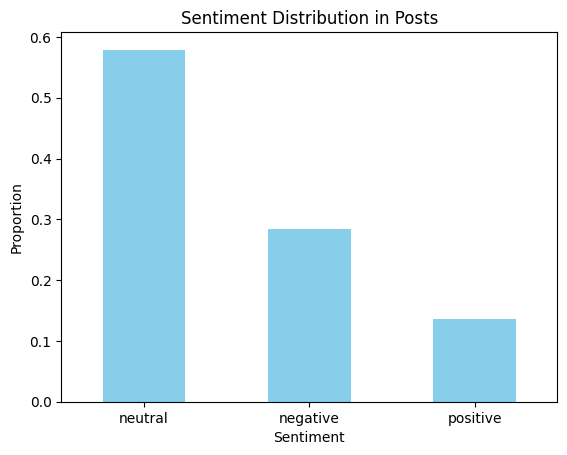

In [55]:
cleaned_posts_df['label'].value_counts(normalize=True).plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution in Posts')
plt.ylabel('Proportion')
plt.xlabel('Sentiment')
plt.xticks(rotation=0)
plt.show()

This bar chart illustrates the distribution of sentiment labels (`positive`, `neutral`, `negative`) across Reddit posts collected between June 7 and June 14. Sentiment was determined using BERT applied to the title of each post.

- **Negative sentiment** was the most common, accounting for approximately **50%** of all posts.

- **Positive sentiment** followed behind at around **39%**.

- **Neutral sentiment** made up about **11%** of posts.

<!-- The relatively balanced distribution suggests that Reddit discussions during this period included a healthy mix of emotional tones, with a slight lean toward neutral and negative expressions. This could reflect the tone of general discourse, user posting behavior, or the nature of the subreddit(s) analyzed. -->

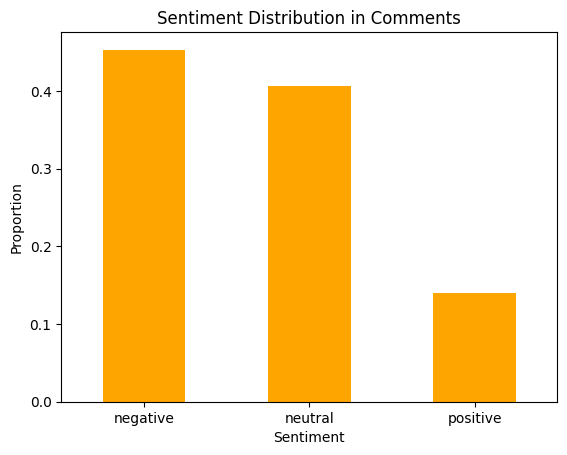

In [56]:
cleaned_comments_df['label'].value_counts(normalize=True).plot(kind='bar', color='orange')
plt.title('Sentiment Distribution in Comments')
plt.ylabel('Proportion')
plt.xlabel('Sentiment')
plt.xticks(rotation=0)
plt.show()

This bar chart visualizes the distribution of sentiment labels across Reddit comments. There is a larger variation of sentiments in comments than posts.

- **Negative sentiment** is the most common, appearing in approximately **53%** of all comments.

- **Positive sentiment** follows with about **29%**.

- **Neutral sentiment** is least common with about **18%**.

**Overall Sentiment Distribution Conclusion:**

Overall, the sentiment distribution in posts and comments are similar. **Negative sentiment** is most common, followed by positive sentiment, and lastly neutral sentiment.

### **Sentiment Distribution by Subreddit**

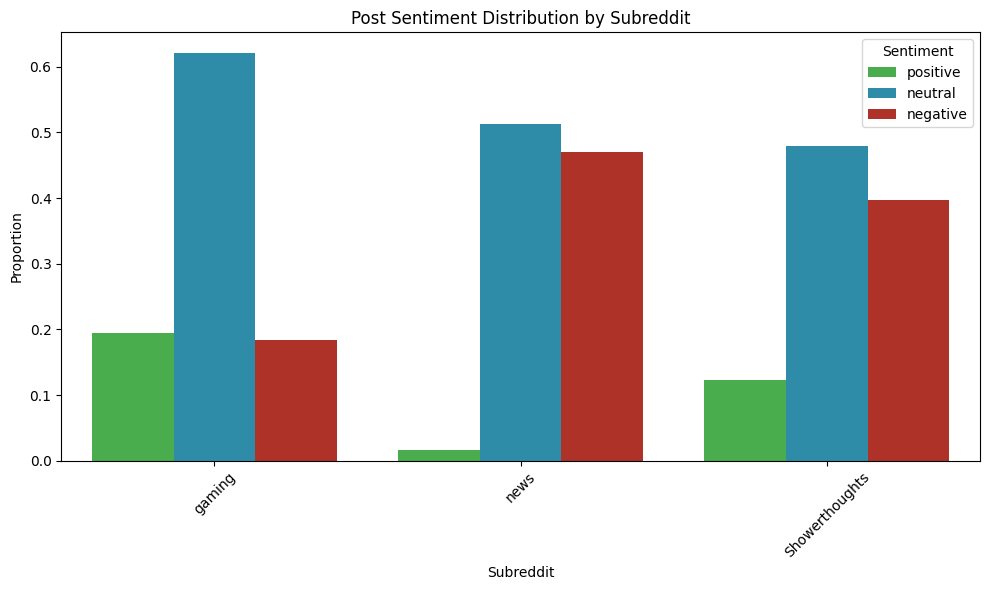

In [57]:
# Get sentiment proportions per subreddit
sentiment_by_subreddit = (
    cleaned_posts_df.groupby("subreddit")["label"]
    .value_counts(normalize=True)
    .rename("proportion")
    .reset_index()
)

# Create visualization
custom_palette = {
    'positive': "#38BE3F",
    'neutral': "#1B97BD",
    'negative': "#C41F10"
}

posts_label_order= ['gaming', 'news', 'Showerthoughts']

plt.figure(figsize=(10, 6))
sns.barplot(
    data=sentiment_by_subreddit,
    x="subreddit",
    y="proportion",
    hue="label",
    hue_order=['positive', 'neutral', 'negative'],
    palette=custom_palette,
    order=posts_label_order
)
plt.title("Post Sentiment Distribution by Subreddit")
plt.ylabel("Proportion")
plt.xlabel("Subreddit")
plt.legend(title="Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

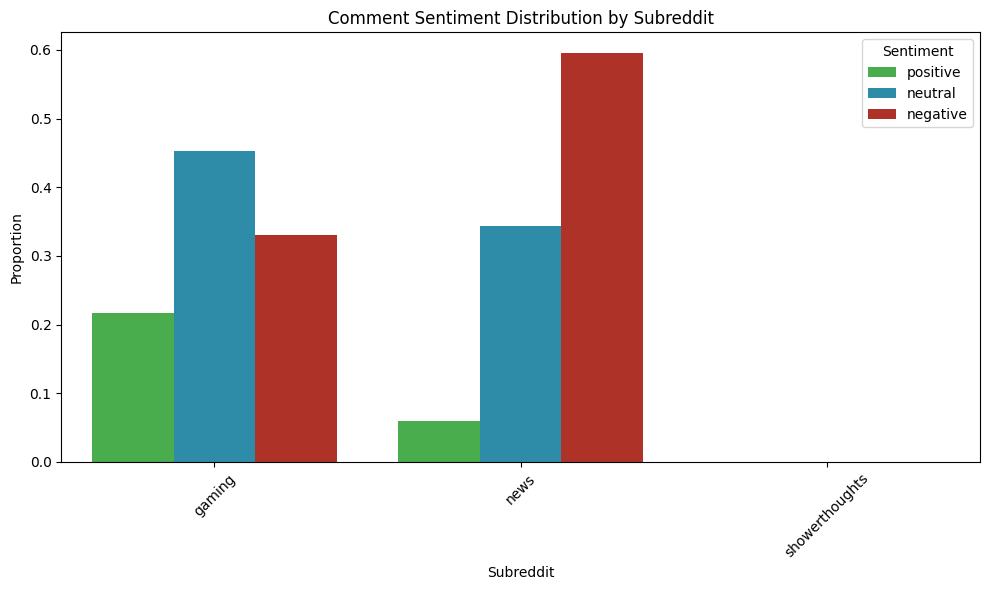

In [58]:
# Get sentiment proportions per subreddit
sentiment_by_subreddit = (
    cleaned_comments_df.groupby("subreddit")["label"]
    .value_counts(normalize=True)
    .rename("proportion")
    .reset_index()
)

# Create visualization
custom_palette = {
    'positive': "#38BE3F",
    'neutral': "#1B97BD",
    'negative': "#C41F10"
}

comments_label_order= ['gaming', 'news', 'showerthoughts']

plt.figure(figsize=(10, 6))
sns.barplot(
    data=sentiment_by_subreddit,
    x="subreddit",
    y="proportion",
    hue="label",
    hue_order=['positive', 'neutral', 'negative'],
    palette=custom_palette,
    order=comments_label_order
)
plt.title("Comment Sentiment Distribution by Subreddit")
plt.ylabel("Proportion")
plt.xlabel("Subreddit")
plt.legend(title="Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Wordcloud**

In [59]:
from wordcloud import WordCloud, STOPWORDS

# Wordcloud function
def generate_wordcloud(text, title, color='white'):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(
        width=800, height=400,
        background_color=color,
        stopwords=stopwords,
        colormap='viridis'  # You can try others like 'plasma', 'cool', etc.
    ).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

### Overall Wordcloud

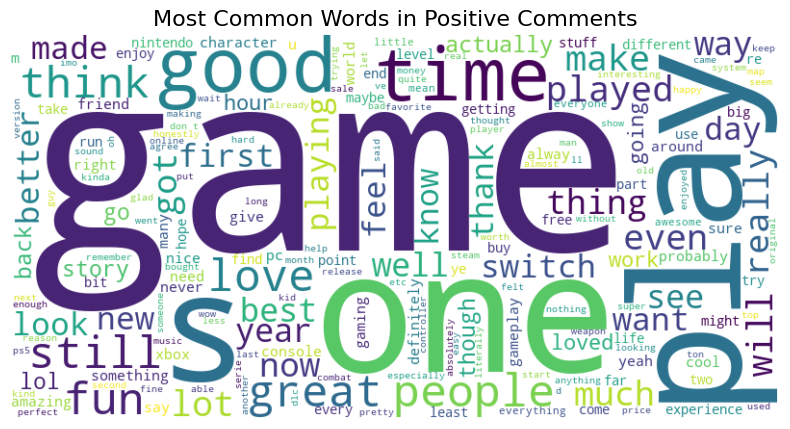

In [60]:
# Join all positive comments
positive_text = " ".join(cleaned_comments_df[cleaned_comments_df['label'] == 'positive']['body'])

# Generate
generate_wordcloud(positive_text, "Most Common Words in Positive Comments")

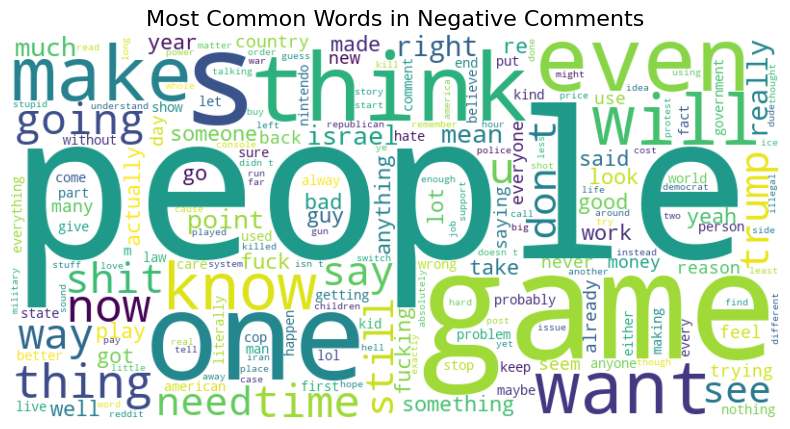

In [61]:
# Join all negative comments
negative_text = " ".join(cleaned_comments_df[cleaned_comments_df['label'] == 'negative']['body'])

# Generate
generate_wordcloud(negative_text, "Most Common Words in Negative Comments")

### Gaming Subreddit Wordcloud

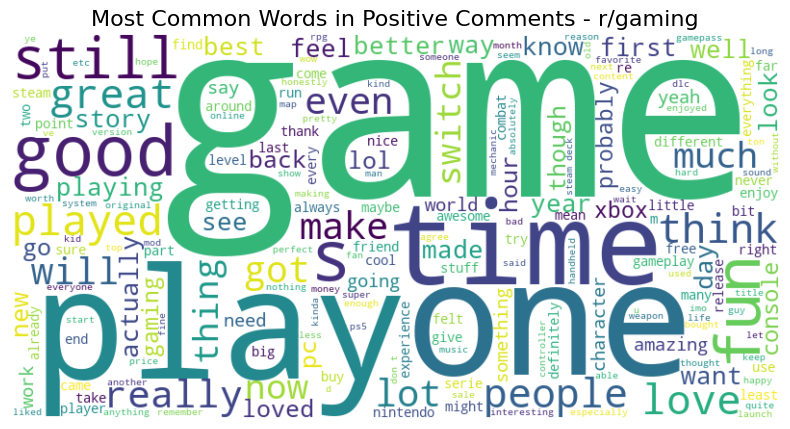

In [62]:
# Filter only normal user comments in r/news
gaming_normal = cleaned_comments_df[
    (cleaned_comments_df['subreddit'] == 'gaming') &
    (cleaned_comments_df['distinguished'] == 'Normal User')
]

# Positive comments from r/gaming
gaming_pos = gaming_normal[
    (cleaned_comments_df['label'] == 'positive')
]

# Join all text into one string
gaming_pos_text = ' '.join(gaming_pos['body'])
generate_wordcloud(gaming_pos_text, 'Most Common Words in Positive Comments - r/gaming')

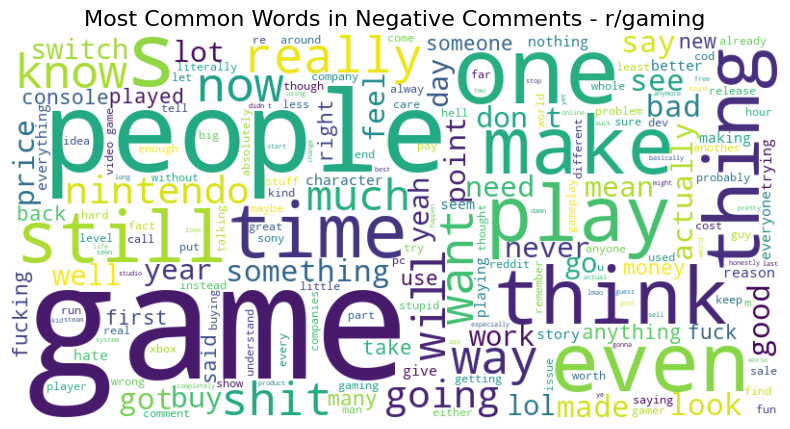

In [63]:
# Negative comments from r/gaming
gaming_neg = gaming_normal[
    (cleaned_comments_df['label'] == 'negative')
]

# Join all text into one string
gaming_neg_text = ' '.join(gaming_neg['body'])
generate_wordcloud(gaming_neg_text, 'Most Common Words in Negative Comments - r/gaming')

### News Subreddit Wordcloud

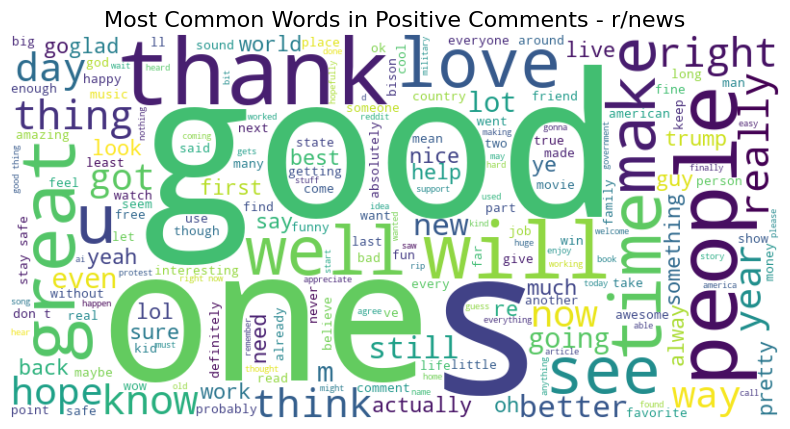

In [64]:
# Filter only normal user comments in r/news
news_normal = cleaned_comments_df[
    (cleaned_comments_df['subreddit'] == 'news') &
    (cleaned_comments_df['distinguished'] == 'Normal User')
]

# Positive comments from r/news
news_pos = news_normal[
    (cleaned_comments_df['label'] == 'positive')
]

# Join all text into one string
news_pos_text = ' '.join(news_pos['body'])
generate_wordcloud(news_pos_text, 'Most Common Words in Positive Comments - r/news')

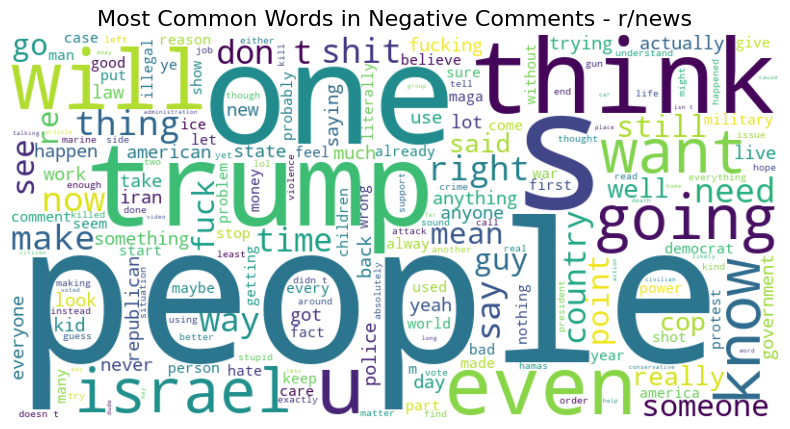

In [65]:
# Negative comments from r/news
news_neg = news_normal[
    (cleaned_comments_df['label'] == 'negative')
]

# Join all text into one string
news_neg_text = ' '.join(news_neg['body'])
generate_wordcloud(news_neg_text, 'Most Common Words in Negative Comments - r/news')

### Showerthoughts Subreddit Wordcloud

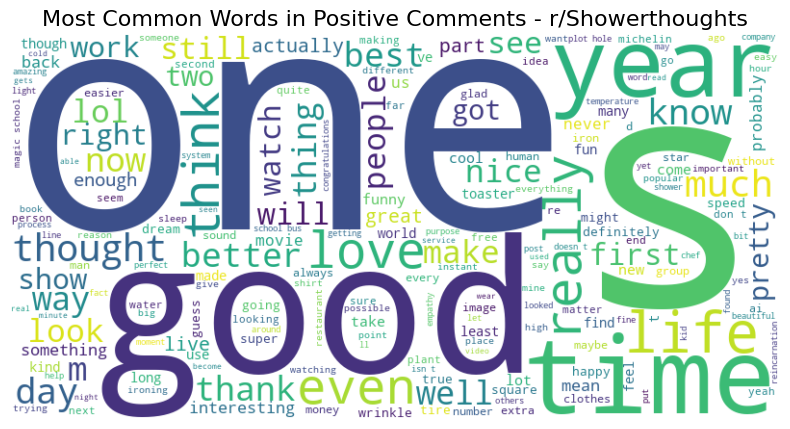

In [66]:
# Normalize subreddit
cleaned_comments_df['subreddit'] = cleaned_comments_df['subreddit'].str.lower()

# Filter only normal user comments in r/showerthoughts
showerthoughts_normal = cleaned_comments_df[
    (cleaned_comments_df['subreddit'] == 'showerthoughts') &
    (cleaned_comments_df['distinguished'] == 'Normal User')
]

# Positive comments from r/Showerthoughts
showerthoughts_pos = showerthoughts_normal[
    (cleaned_comments_df['label'] == 'positive')
]

# Join all text into one string
showerthoughts_pos_text = ' '.join(showerthoughts_pos['body'])
generate_wordcloud(showerthoughts_pos_text, 'Most Common Words in Positive Comments - r/Showerthoughts')

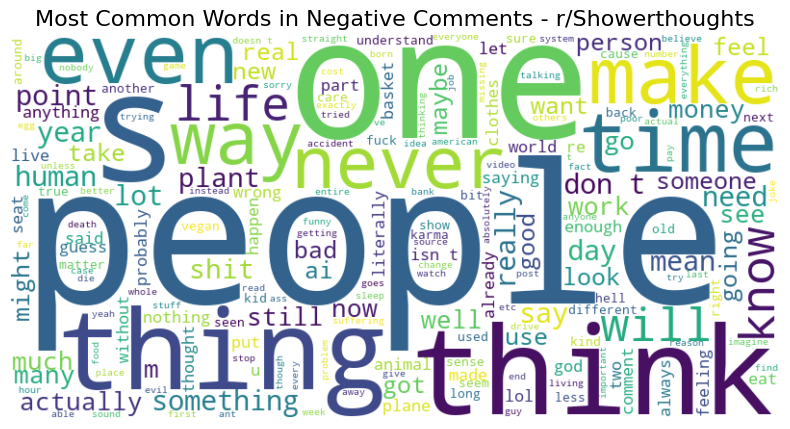

In [67]:
# Negative comments from r/Showerthoughts
showerthoughts_neg = showerthoughts_normal[
    (cleaned_comments_df['label'] == 'negative')
]

# Join all text into one string
showerthoughts_neg_text = ' '.join(showerthoughts_neg['body'])
generate_wordcloud(showerthoughts_neg_text, 'Most Common Words in Negative Comments - r/Showerthoughts')

## **Modeling**
Implement deep learning model with sentiment as target variable

### **Data Prep for Models**

In [68]:
# Function for clean text

def clean_text_for_vectorizer(text):
    text = text.lower()
    text = re.sub(r'\[no text\]', '', text)             # remove placeholder
    text = re.sub(r'https?://\S+|www\.\S+', '', text)   # removes URLs
    text = re.sub(r'<.*?>', ' ', text)                  # remove HTML tags
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)         # removes special characters
    return text.strip()

In [69]:
# Vectorize Text using TF-IDF

vectorizer = TfidfVectorizer(
    max_features=1000      # limit to top 1000 words
    # min_df=3,
    # max_df=0.95,
    # sublinear_tf=True
)

X = vectorizer.fit_transform(cleaned_comments_df["body"].apply(clean_text_for_vectorizer))
X = X.toarray().astype(np.float32)

y = cleaned_comments_df["sentiment"].values

**Class Distribution**

In [70]:
class_counts = Counter(y)
for label, count in class_counts.items():
    print(f"Label {label} count: {count}")

Label 1 count: 76339
Label 0 count: 84980
Label 2 count: 26236


### **Logistic Regression Model**

In [71]:
# Split the data
lr_train_X, lr_test_X, lr_train_y, lr_test_y = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [72]:
from sklearn.preprocessing import StandardScaler
# Scaling the data
scaler = StandardScaler()
lr_X_train_scaled = scaler.fit_transform(lr_train_X)
lr_X_test_scaled = scaler.transform(lr_test_X)

In [73]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(class_weight='balanced', max_iter=1000)
lr_model.fit(lr_X_train_scaled, lr_train_y)
lr_pred_y = lr_model.predict(lr_X_test_scaled)

print(classification_report(lr_test_y, lr_pred_y))
print("Accuracy:", accuracy_score(lr_test_y, lr_pred_y))

              precision    recall  f1-score   support

           0       0.77      0.67      0.71     16996
           1       0.67      0.66      0.67     15268
           2       0.49      0.72      0.58      5247

    accuracy                           0.67     37511
   macro avg       0.64      0.68      0.65     37511
weighted avg       0.69      0.67      0.68     37511

Accuracy: 0.671936232038602


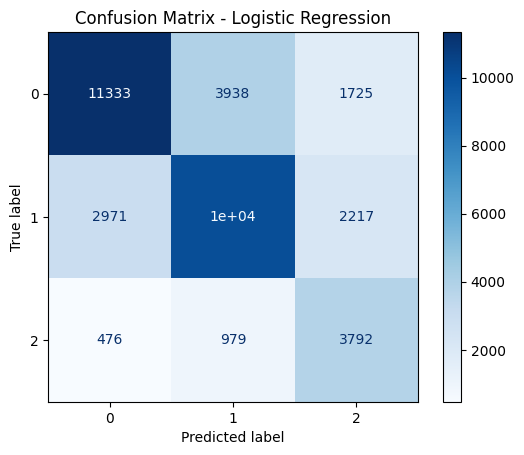

In [74]:
cm = confusion_matrix(lr_test_y, lr_pred_y)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

**Top 5 Words Contributing to Each Sentiment**

In [75]:
feature_names = vectorizer.get_feature_names_out()
class_labels = lr_model.classes_
coefs = lr_model.coef_

label_map = {0: 'Negative',
             1: 'Neutral',
             2: 'Positive'}

# For each class (e.g., Negative, Neutral, Positive)
top_n = 10
top_words_data = []

for i, label in enumerate(class_labels):
    sentiment = label_map[label]
    print(f"\nTop 10 words for class: {sentiment}")
    top_indices = np.argsort(coefs[i])[-top_n:]
    for j in reversed(top_indices):
        print(f"{feature_names[j]}: {coefs[i][j]:.4f}")
        word = feature_names[j]
        weight = coefs[i][j]
        top_words_data.append((sentiment, word, weight))

df_top_words = pd.DataFrame(top_words_data, columns=["Sentiment", "Word", "Weight"])


Top 10 words for class: Negative
fuck: 0.3085
fucking: 0.2919
shit: 0.2537
stupid: 0.2476
worse: 0.1748
not: 0.1660
hate: 0.1616
fucked: 0.1494
don: 0.1369
people: 0.1295

Top 10 words for class: Neutral
or: 0.0673
bypass: 0.0624
predominantly: 0.0550
compose: 0.0549
submit: 0.0545
circumvent: 0.0510
court: 0.0458
if: 0.0396
moderators: 0.0393
isn: 0.0374

Top 10 words for class: Positive
good: 0.2818
great: 0.2334
love: 0.2271
fun: 0.1968
amazing: 0.1847
loved: 0.1707
thank: 0.1698
best: 0.1644
awesome: 0.1533
cool: 0.1454


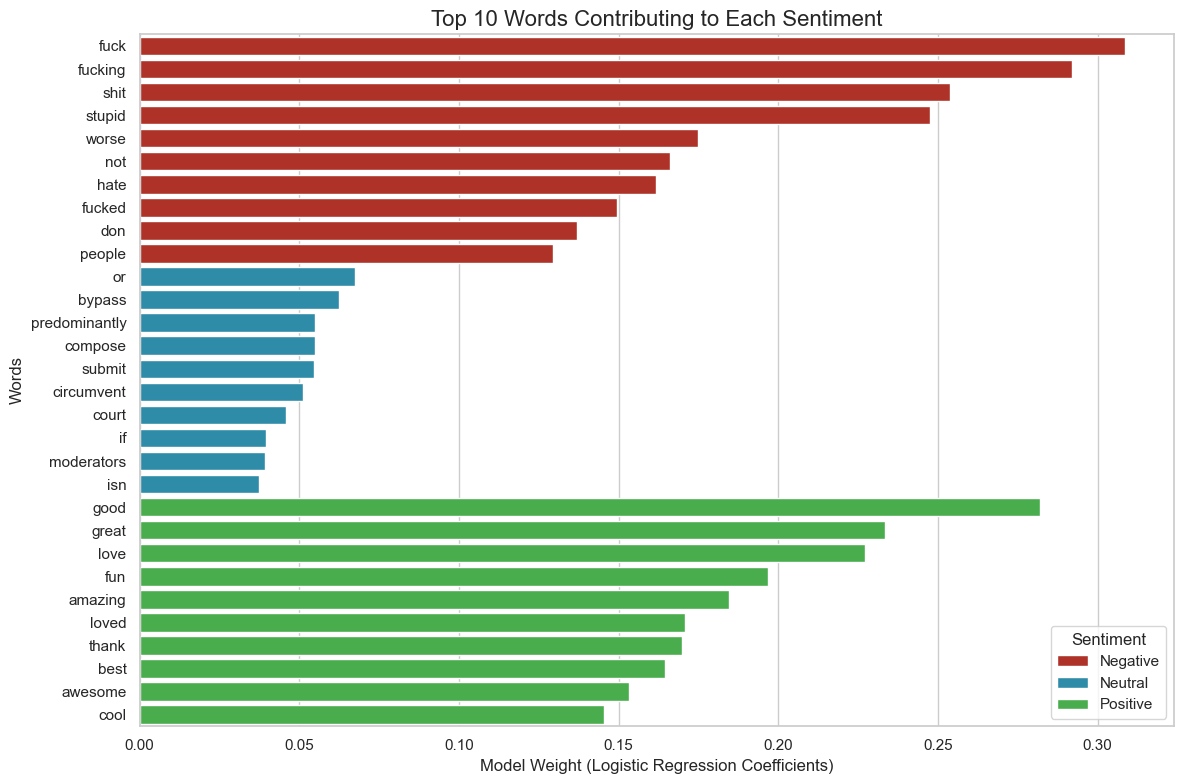

In [76]:
# Create visualization
custom_palette = {
    'Positive': "#38BE3F",
    'Neutral': "#1B97BD",
    'Negative': "#C41F10"
}

# Plotting
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create horizontal barplot
sns.barplot(
    data=df_top_words,
    x="Weight",
    y="Word",
    hue="Sentiment",
    palette=custom_palette
)

# Styling
plt.title("Top 10 Words Contributing to Each Sentiment", fontsize=16)
plt.xlabel("Model Weight (Logistic Regression Coefficients)")
plt.ylabel("Words")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

### **Random Forest Model**

In [77]:
# Split the data
rf_train_X, rf_test_X, rf_train_y, rf_test_y = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [78]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(rf_train_X, rf_train_y)

# Make predictions
rf_pred_y = rf_model.predict(rf_test_X)

# Classification report
print(classification_report(rf_test_y, rf_pred_y))

# Accuracy score
print("Accuracy:", accuracy_score(rf_test_y, rf_pred_y))

              precision    recall  f1-score   support

           0       0.65      0.79      0.71     16996
           1       0.67      0.61      0.64     15268
           2       0.73      0.38      0.50      5247

    accuracy                           0.66     37511
   macro avg       0.68      0.59      0.62     37511
weighted avg       0.67      0.66      0.65     37511

Accuracy: 0.6614326464237157


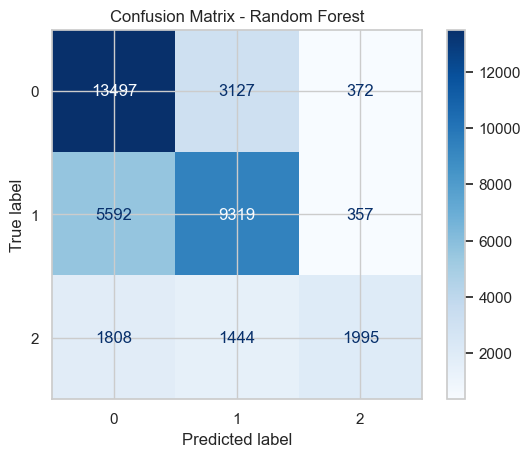

In [79]:
cm = confusion_matrix(rf_test_y, rf_pred_y)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()

## **Deep-Learning Modeling**

### **Autoencoder** — Feature Extraction for MLP model

In [80]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Linear(512, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 512),
            nn.ReLU(),
            nn.Linear(512, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [81]:
# Convert X to Tensor
X_tensor = torch.tensor(X, dtype=torch.float32, device=device)
ae_dataset = TensorDataset(X_tensor)
ae_dataloader = DataLoader(ae_dataset, batch_size=32, shuffle=True)     # Setup DataLoader for autoencoder

In [82]:
# Set Dimensions
input_dim = X.shape[1]      # 1000 (TF-IDF features)
latent_dim = 128

# Model Hyperparamters Setup
autoencoder = Autoencoder(input_dim=input_dim, latent_dim=latent_dim)
# autoencoder.load_state_dict(torch.load("autoencoder_final.pth"))
autoencoder = autoencoder.to(device)        # Moves model and data batches to GPU

In [83]:
# Loss Function and Optimizer Setup
optimizer = optim.Adam(autoencoder.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

# Train Loop
epochs = 20
autoencoder.train()

for epoch in range(epochs):
    total_loss = 0
    for (batch,) in ae_dataloader:
        batch = batch.to(device)
        optimizer.zero_grad()
        reconstructed = autoencoder(batch)
        loss = loss_fn(reconstructed, batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss/len(ae_dataloader):.4f}")

Epoch 1, Loss: 0.0014
Epoch 2, Loss: 0.0010
Epoch 3, Loss: 0.0010
Epoch 4, Loss: 0.0009
Epoch 5, Loss: 0.0006
Epoch 6, Loss: 0.0004
Epoch 7, Loss: 0.0003
Epoch 8, Loss: 0.0003
Epoch 9, Loss: 0.0003
Epoch 10, Loss: 0.0002
Epoch 11, Loss: 0.0002
Epoch 12, Loss: 0.0002
Epoch 13, Loss: 0.0002
Epoch 14, Loss: 0.0002
Epoch 15, Loss: 0.0002
Epoch 16, Loss: 0.0002
Epoch 17, Loss: 0.0002
Epoch 18, Loss: 0.0001
Epoch 19, Loss: 0.0001
Epoch 20, Loss: 0.0001


In [84]:
# # Save Autoencoder Model
# torch.save(autoencoder.state_dict(), "autoencoder_final.pth")

In [85]:
# Feature Extraction, store encoded vectors
autoencoder.eval()
with torch.no_grad():
    X_encoded = autoencoder.encoder(X_tensor.to(device))

In [86]:
# Split encoded data in train and val datasets
X_encoded_np = X_encoded.cpu().numpy()

train_X, val_X, train_y, val_y = train_test_split(
    X_encoded_np, y, test_size=0.2, stratify=y, random_state=42
)

In [87]:
# Convert dataset into Tensor

train_dataset = TensorDataset(torch.tensor(train_X, dtype=torch.float32),
                              torch.tensor(train_y, dtype=torch.long))
val_dataset = TensorDataset(torch.tensor(val_X, dtype=torch.float32),
                            torch.tensor(val_y, dtype=torch.long))

# Dataloader Setup
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

### **MLP Neural Network Classifier**

In [88]:
# Model Architecture
class SentimentMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim):
        super(SentimentMLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.dropout3 = nn.Dropout(0.3)
        self.fc4 = nn.Linear(hidden_dim3, output_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = F.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.fc4(x)
        return x

In [89]:
# Set Dimensions
input_dim = X_encoded.shape[1]
hidden_dim1 = 512
hidden_dim2 = 256
hidden_dim3 = 128
output_dim = 3

# Model Hyperparamters Setup
model = SentimentMLP(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim)
# model.load_state_dict(torch.load("mlp_model_final.pth"))
model = model.to(device)

In [90]:
# Class Weight
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_y),
    y=train_y
)

# Convert to torch tensor and move to device
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32).to(device)

# Loss Function, Optimizer, Scheduler Setup
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.9)

In [91]:
# MLP Training Loop

train_losses = []
train_accuracies = []

epochs = 75

for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for batch_x, batch_y in train_loader:
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)
        
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()

    scheduler.step()

    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)

    accuracy = correct / total
    train_accuracies.append(accuracy)

    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")

Epoch 1, Loss: 0.8537
Epoch 2, Loss: 0.8035
Epoch 3, Loss: 0.7815
Epoch 4, Loss: 0.7651
Epoch 5, Loss: 0.7512
Epoch 6, Loss: 0.7394
Epoch 7, Loss: 0.7292
Epoch 8, Loss: 0.7189
Epoch 9, Loss: 0.7132
Epoch 10, Loss: 0.7046
Epoch 11, Loss: 0.6941
Epoch 12, Loss: 0.6871
Epoch 13, Loss: 0.6814
Epoch 14, Loss: 0.6742
Epoch 15, Loss: 0.6697
Epoch 16, Loss: 0.6624
Epoch 17, Loss: 0.6569
Epoch 18, Loss: 0.6521
Epoch 19, Loss: 0.6453
Epoch 20, Loss: 0.6416
Epoch 21, Loss: 0.6346
Epoch 22, Loss: 0.6296
Epoch 23, Loss: 0.6248
Epoch 24, Loss: 0.6216
Epoch 25, Loss: 0.6193
Epoch 26, Loss: 0.6139
Epoch 27, Loss: 0.6105
Epoch 28, Loss: 0.6073
Epoch 29, Loss: 0.6042
Epoch 30, Loss: 0.6022
Epoch 31, Loss: 0.5968
Epoch 32, Loss: 0.5927
Epoch 33, Loss: 0.5899
Epoch 34, Loss: 0.5875
Epoch 35, Loss: 0.5877
Epoch 36, Loss: 0.5856
Epoch 37, Loss: 0.5824
Epoch 38, Loss: 0.5792
Epoch 39, Loss: 0.5778
Epoch 40, Loss: 0.5745
Epoch 41, Loss: 0.5706
Epoch 42, Loss: 0.5697
Epoch 43, Loss: 0.5650
Epoch 44, Loss: 0.56

In [92]:
# MLP Model Evaluation

model.eval()
all_preds = []
all_labels = []

labels = ['negative', 'neutral', 'positive']

with torch.no_grad():
    for batch_x, batch_y in val_loader:
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)
        outputs = model(batch_x)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(batch_y.cpu().numpy())

# Classification Report

print("\nClassification Report:\n")
print(classification_report(all_labels, all_preds, target_names=labels))

print("\nConfusion Matrix:\n")
print(confusion_matrix(all_labels, all_preds))

print("\nPredicted labels:", Counter(all_preds))


Classification Report:

              precision    recall  f1-score   support

    negative       0.73      0.66      0.70     16996
     neutral       0.65      0.64      0.65     15268
    positive       0.46      0.63      0.53      5247

    accuracy                           0.65     37511
   macro avg       0.62      0.64      0.63     37511
weighted avg       0.66      0.65      0.65     37511


Confusion Matrix:

[[11283  3998  1715]
 [ 3409  9762  2097]
 [  762  1188  3297]]

Predicted labels: Counter({np.int64(0): 15454, np.int64(1): 14948, np.int64(2): 7109})


In [93]:
# # Save MLP Model
# torch.save(model.state_dict(), "mlp_model_final.pth")

In [94]:
# # Save Model Train Metrics
# with open("train_metrics.json", "w") as f:
#     json.dump({
#         "losses": train_losses,
#         "accuracies": train_accuracies
#     }, f)

## **MLP Model Performance Visualizations**

**Reload Autoencoder and MLP Models**

In [95]:
# autoencoder = Autoencoder(input_dim, latent_dim).to(device)
# autoencoder.load_state_dict(torch.load("autoencoder_final.pth", map_location=device))
# autoencoder.eval()

# mlp_model = SentimentMLP(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim).to(device)
# mlp_model.load_state_dict(torch.load("mlp_model_final.pth", map_location=device))
# mlp_model.eval()

**Reload Train Metrics**

In [96]:
# with open("train_metrics.json", "r") as f:
#     metrics = json.load(f)
#     train_losses = metrics["losses"]
#     train_accuracies = metrics["accuracies"]

### **Training Loss Over Time Plot**

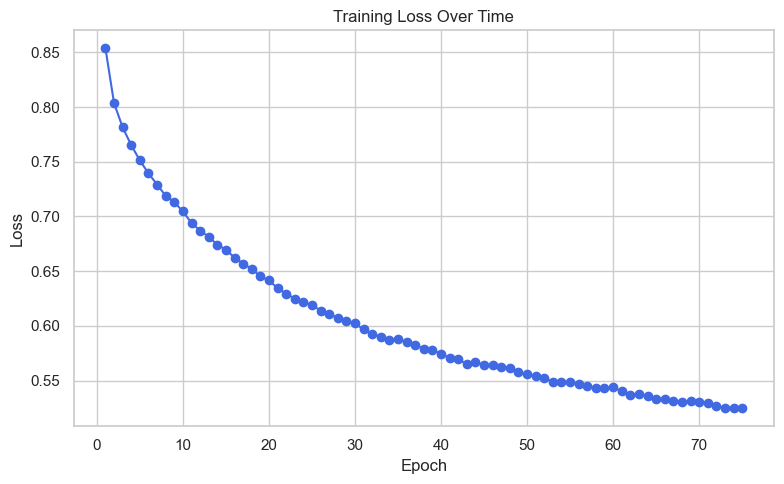

In [97]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_losses)+1), train_losses, marker='o', color='royalblue')
plt.title("Training Loss Over Time")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
plt.show()

### **Accuracy Over Time Plot**

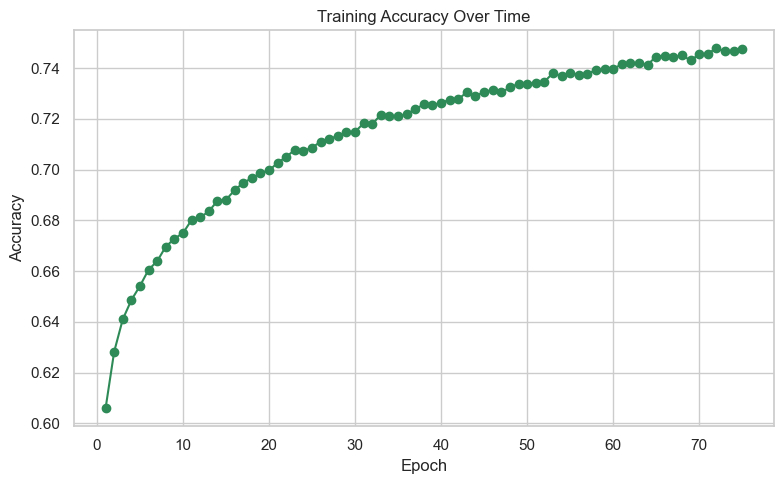

In [98]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_accuracies)+1), train_accuracies, marker='o', color='seagreen')
plt.title("Training Accuracy Over Time")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

### **Confusion Matrix Heatmap**

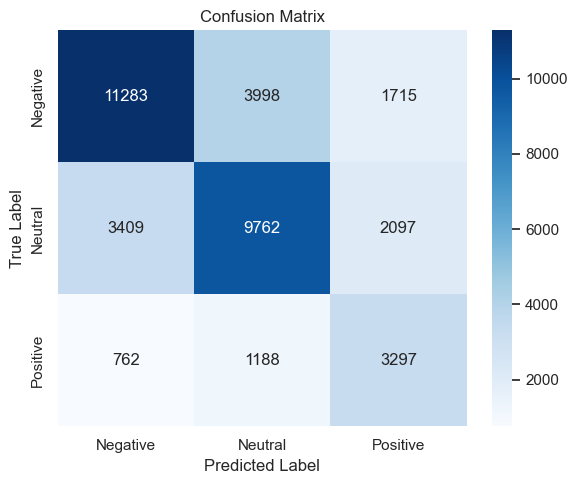

In [99]:
labels = ['Negative', 'Neutral', 'Positive']
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

### **Class-wise F1 Compariston Chart**

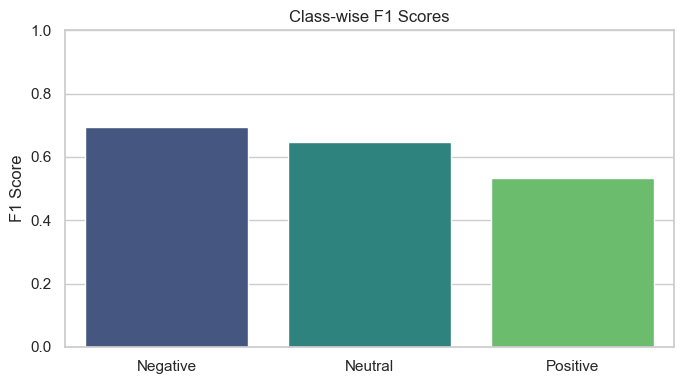

In [100]:
# Convert classification report to dictionary
report_dict = classification_report(all_labels, all_preds, target_names=labels, output_dict=True)

# Get F1 scores
f1_scores = {label: report_dict[label]['f1-score'] for label in labels}

# Bar chart
plt.figure(figsize=(7, 4))
sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()), palette="viridis")
plt.ylim(0, 1)
plt.title("Class-wise F1 Scores")
plt.ylabel("F1 Score")
plt.tight_layout()
plt.show()